In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import os

from official.vision.detection.dataloader import input_reader
from official.modeling.hyperparams import params_dict
from official.vision.detection.configs.retinanet_config import RETINANET_CFG

%load_ext autoreload
%autoreload 2

nb_train_imgs = 118287

!echo $PYTHONPATH
tf.__version__

/home/tgyal/ml_input_processing/experiments/ml/models


'2.7.0'

## Checking input data

In [3]:
batch_size = 32
num_examples = 1*batch_size #nb_train_imgs
training_file_pattern = '/training-data/coco/train-*'
#training_file_pattern = '/home/tgyal/training-data/coco/train-*'
RETINANET_CFG.override({
    'train': {
        'batch_size': batch_size
    }
}, is_strict=False)
train_input_fn = input_reader.InputFn(
        file_pattern=training_file_pattern,
        params=RETINANET_CFG,
        mode=input_reader.ModeKeys.TRAIN,
        batch_size=batch_size,
        num_examples=num_examples)
dataset = train_input_fn()
#element_spec=train_input_fn()

In [5]:
element_spec

(TensorSpec(shape=(32, 640, 640, 3), dtype=tf.bfloat16, name=None),
 {'cls_targets': OrderedDict([(3,
                TensorSpec(shape=(32, 80, 80, 9), dtype=tf.int32, name=None)),
               (4,
                TensorSpec(shape=(32, 40, 40, 9), dtype=tf.int32, name=None)),
               (5,
                TensorSpec(shape=(32, 20, 20, 9), dtype=tf.int32, name=None)),
               (6,
                TensorSpec(shape=(32, 10, 10, 9), dtype=tf.int32, name=None)),
               (7,
                TensorSpec(shape=(32, 5, 5, 9), dtype=tf.int32, name=None))]),
  'box_targets': OrderedDict([(3,
                TensorSpec(shape=(32, 80, 80, 36), dtype=tf.float32, name=None)),
               (4,
                TensorSpec(shape=(32, 40, 40, 36), dtype=tf.float32, name=None)),
               (5,
                TensorSpec(shape=(32, 20, 20, 36), dtype=tf.float32, name=None)),
               (6,
                TensorSpec(shape=(32, 10, 10, 36), dtype=tf.float32, name=None)),
        

rm: cannot remove '/training-data/cache_temp/*': No such file or directory
epoch 0 batch 0


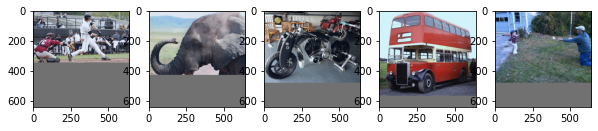

epoch 1 batch 0


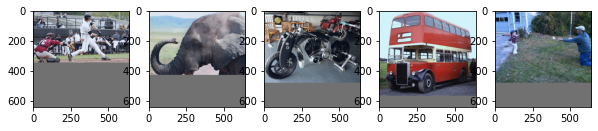

epoch 2 batch 0


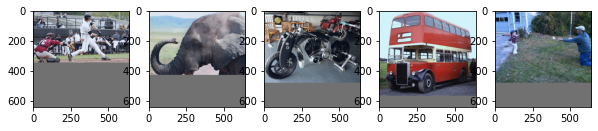

epoch 3 batch 0


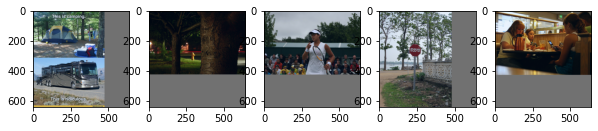

epoch 4 batch 0


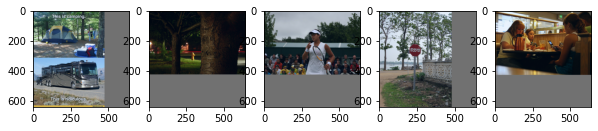

epoch 5 batch 0


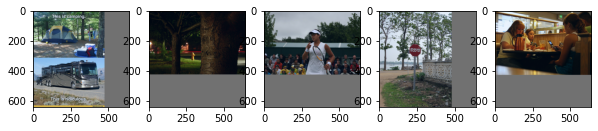

epoch 6 batch 0


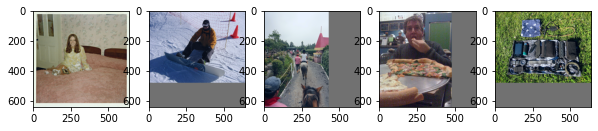

epoch 7 batch 0


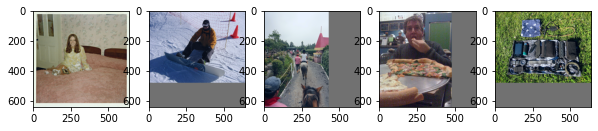

break
done


In [4]:
!sudo rm -r /training-data/cache_temp/*
!sudo rm -r /home/tgyal/training-data/cache_temp/*
nb_imgs_per_batch_to_show = 5

batch_start_idx = 0
nb_batches = 1
epochs = range(8)

batch_idx_1st_ep = set(range(batch_start_idx, batch_start_idx+nb_batches))
batches_per_ep = num_examples//batch_size
batch_idx_to_show = set([b + ep*batches_per_ep for ep in epochs for b in batch_idx_1st_ep])
#batch_idx_to_show = set([b + shift + ep*batches_per_ep for ep in epochs for b in batch_idx_1st_ep for shift in [0, batches_per_ep/2]])

batch_idx=0
iterator=dataset.as_numpy_iterator()
for images, _ in iterator:#.as_numpy_iterator()  # example is (image, label)
    if len(batch_idx_to_show) == 0:
        print("break")
        break
    if batch_idx in batch_idx_to_show:
        batch_idx_to_show.remove(batch_idx)
        print(f"epoch {batch_idx // batches_per_ep} batch {batch_idx%batches_per_ep}")

        fig, ax = plt.subplots(nrows=1, ncols=nb_imgs_per_batch_to_show, figsize=(2*nb_imgs_per_batch_to_show, 10))
        i=0
        for col in ax: # iterate over batch elem
            image = images[i].astype(np.float32)
            #print(label.numpy()[i,0])
            image = (image+abs(np.min(image)))/(np.max(image)-np.min(image))
            col.imshow(np.squeeze(image))
            i+=1
        plt.show()
    else:
        print(f"batch {batch_idx%batches_per_ep}/{batches_per_ep}", end="\r")

    batch_idx+=1
print("done")

## Cache cleaner script

In [1]:
import time
import shutil
import glob
import os
from collections import OrderedDict

In [4]:
f"{os.getenv('HOME')}"

'/home/tgyal'

In [8]:
cache_dir="/training-data/cache_temp"
cache_files_pattern = os.path.join(cache_dir, "*.easl")
nb_epochs_to_keep = 2
period = 5 # in seconds
cache_files_pattern

'/training-data/cache_temp/*.easl'

In [3]:
files = sorted(glob.glob(cache_files_pattern), key=os.path.getmtime)
files

['/training-data/cache_temp/rDMIHqA5_06_00000000.easl',
 '/training-data/cache_temp/rDMIHqA5_02_00000000.easl',
 '/training-data/cache_temp/rDMIHqA5_00_00000000.easl',
 '/training-data/cache_temp/rDMIHqA5_05_00000000.easl',
 '/training-data/cache_temp/rDMIHqA5_04_00000001.easl',
 '/training-data/cache_temp/rDMIHqA5_04_00000000.easl',
 '/training-data/cache_temp/rDMIHqA5_01_00000000.easl',
 '/training-data/cache_temp/rDMIHqA5_01_00000001.easl',
 '/training-data/cache_temp/rDMIHqA5_03_00000001.easl',
 '/training-data/cache_temp/rDMIHqA5_03_00000000.easl',
 '/training-data/cache_temp/rDMIHqA5_07_00000000.easl',
 '/training-data/cache_temp/rDMIHqA5_07_00000001.easl',
 '/training-data/cache_temp/fuShTOxL_06_00000000.easl',
 '/training-data/cache_temp/fuShTOxL_07_00000000.easl',
 '/training-data/cache_temp/fuShTOxL_05_00000000.easl',
 '/training-data/cache_temp/fuShTOxL_04_00000000.easl',
 '/training-data/cache_temp/fuShTOxL_00_00000000.easl',
 '/training-data/cache_temp/fuShTOxL_00_00000001

In [19]:
hashes = [path.replace(cache_dir,'')[:8] for path in files]
hashes = list(OrderedDict.fromkeys(hashes))
hashes

['rDMIHqA5', 'fuShTOxL']

In [21]:
hashes_to_delete = hashes[:-1]
hashes_to_delete

['rDMIHqA5']

In [22]:
paths_to_delete = [cache_dir + h + "*.easl" for h in hashes_to_delete]
paths_to_delete

['/training-data/cache_temp/rDMIHqA5*.easl']

In [3]:
import time
import glob
import os
from collections import OrderedDict

cache_dir="/training-data/cache_temp"
cache_files_pattern = os.path.join(cache_dir, "*.easl")
nb_epochs_to_keep = 1
period = 1 # in seconds

print(f"Looking for files to delete in '{cache_dir}'...")

while True:
    files = sorted(glob.glob(cache_files_pattern), key=os.path.getmtime)
    all_hashes = [path.replace(cache_dir,'')[:8] for path in files]
    hashes = list(OrderedDict.fromkeys(all_hashes))
    hashes_to_delete = hashes if nb_epochs_to_keep==0 else hashes[:-nb_epochs_to_keep]
    paths_to_delete = [cache_dir + h + "*.easl" for h in hashes_to_delete]

    for path_pattern in paths_to_delete:
        for path in sorted(glob.glob(path_pattern)):
            print(f"Deleting '{path}'")
            os.remove(path)
        print("")
    time.sleep(period)

Looking for files to delete in '/training-data/cache_temp'...
Deleting '/training-data/cache_temp/5FZ83noj_00_00000000.easl'
Deleting '/training-data/cache_temp/5FZ83noj_01_00000000.easl'
Deleting '/training-data/cache_temp/5FZ83noj_01_00000001.easl'
Deleting '/training-data/cache_temp/5FZ83noj_02_00000000.easl'
Deleting '/training-data/cache_temp/5FZ83noj_02_00000001.easl'
Deleting '/training-data/cache_temp/5FZ83noj_03_00000000.easl'
Deleting '/training-data/cache_temp/5FZ83noj_04_00000000.easl'
Deleting '/training-data/cache_temp/5FZ83noj_04_00000001.easl'
Deleting '/training-data/cache_temp/5FZ83noj_05_00000000.easl'
Deleting '/training-data/cache_temp/5FZ83noj_06_00000000.easl'
Deleting '/training-data/cache_temp/5FZ83noj_06_00000001.easl'
Deleting '/training-data/cache_temp/5FZ83noj_07_00000000.easl'
Deleting '/training-data/cache_temp/5FZ83noj_00_00000000.easl'
Deleting '/training-data/cache_temp/5FZ83noj_01_00000000.easl'
Deleting '/training-data/cache_temp/5FZ83noj_01_00000001

KeyboardInterrupt: 